# Predicting Stroke Risk and Enhancing Patient Safety Using Supervised Machine Learning.

## Problem Statement
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Stroke is a major public health issue. Early detection of high-risk individuals and risk factors associated with stroke can guide preventive interventions and public health actions to control the disease. This project applies supervised machine learning techniques to predict stroke occurrence using healthcare data. The data is obtained from ([kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)).

## Main Objective
To build and evaluate supervised machine learning models for stroke classification using healthcare data.

## Specific Objectives
* Determine demographic and clinical risk factors of stroke.
* Compare multiple models to identify one that provides the optimal balance of performance metrics.
* Optimize the final model to achieve a high stroke detection rate (targeting a minimum recall of 90%).
* Show how stroke risk prediction can support early screening and better preventive care decisions.

### 1.0 Exploratory data understanding and pre-processing
- Importing the libraries
- Loading the data and data understanding
- Data Cleaning
- Visualizing relationships between variables.
- Feature Encoding

In [190]:
# Import the libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


#### 1.1 Loading data and data understanding
Loading the data and understanding what it contains.

In [191]:
# Load the data
df = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [192]:
# Last 5 rows of the dataframe
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [193]:
# Shape of the dataframe
df.shape

(5110, 11)

In [194]:
# Columns with null values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [195]:
# Duplicates in the df
df.duplicated().value_counts()

False    5110
dtype: int64

In [196]:
# Datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


**Summary**

The dataset contains 5110 rows and 11 columns.

There are no duplicates in the dataset.

The column `bmi` has 201 missing values.

3 columns (`hypertension`, `heart_disease` and `stroke`) have been label encoded already.

`age`, `avg_glucose_level` and `bmi` are numerical columns while all the other columns are categorical.


#### 1.2 Data cleaning
Describe data in the `bmi` column and fill missing values with the mean.

In [197]:
# Desciption of numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [198]:
# Fill missing values with the mean
df['bmi'] = df['bmi'].fillna(value=df['bmi'].median())
df['bmi'].isna().sum()

0

#### 1.3 Visualizing relationships between variables


#### 1.4 Feature encoding
Using one hot encoder to tranform the categorical columns into numerical format for machine learning alogarithms.

In [199]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [200]:
# Create a copy of the df
stroke_df = df.copy()

# The columns to be encoded
ohe_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply OHE
df_encoded = pd.get_dummies(stroke_df, columns=ohe_cols, drop_first=True)
df_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


2.0 Model Training

In [201]:
# copy of the df
stroke_data = df.copy()

# Define X and y columns
X = stroke_data.drop(columns=['stroke'])
y = df['stroke']

In [202]:
# identify feature types
num_features = ['age', 'avg_glucose_level', 'bmi']

bin_features = ['hypertension', 'heart_disease']

cat_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [203]:
# split the df into training and test data
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.3)

In [204]:
# Scaling the numerical columns on the train data
# Insamtiate the standard scaler
scaler = StandardScaler()

# Fit and transform the numerical data
num_scaled = scaler.fit_transform(X_train[num_features])

# Convert back to a df
num_scaled_df = pd.DataFrame(num_scaled, columns=num_features, index=X_train.index)


In [205]:
# OHE categorical columns
# Instantiate the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical data
cat_encoded = encoder.fit_transform(X_train[cat_features])

# Assign new feature names
feature_names = encoder.get_feature_names(cat_features)

# convert to a df
cat_encoded_df = pd.DataFrame(cat_encoded,columns=feature_names, index=X_train.index)


In [206]:
# Extract the binary columns
bin_df = X_train[bin_features].copy()

In [207]:
# Merge the preprocessed data
X_train_processed = pd.concat([
    num_scaled_df, cat_encoded_df, bin_df
], axis=1)

X_train_processed.shape

(3577, 20)

In [208]:
# Baseline model Logistic Regression
# Instantiate the model
baseline_model = LogisticRegression(random_state=42)

# Train the model
baseline_model.fit(X_train_processed, y_train)

LogisticRegression(random_state=42)

In [209]:
# Preprocess the X_test
# transform the numerical data and convert to df
test_num_scaled = scaler.transform(X_test[num_features])
test_num_scaled_df = pd.DataFrame(test_num_scaled, columns=num_features, index=X_test.index)

# Transform categorical data and convert to df
feature_names = encoder.get_feature_names(cat_features)
test_cat_encoded = encoder.transform(X_test[cat_features])
test_cat_encoded_df = pd.DataFrame(test_cat_encoded,columns=feature_names, index=X_test.index)

# Extract binary columns
test_bin_df = X_test[bin_features].copy()

# Merge the preprocessed data
X_test_processed = pd.concat([
    test_num_scaled_df, test_cat_encoded_df, test_bin_df
], axis=1)

X_test_processed.shape

(1533, 20)

In [210]:
# Prediction on the test set(model performance)
y_pred = baseline_model.predict(X_test_processed)

p_pred_prob = baseline_model.predict_proba(X_test_processed)[:,1]

In [211]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(class_report)


Accuracy: 0.9426

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



```The Baseline Model``
Using a logistic regression;
* Accuracy shows the model was correct 94% of the time.
* There is an imbalance of the classes with class 0(no stroke) having majority of the samples 1444(94%), hence the high accuracy where the model is predicting from those without stroke.
* The model only used about 1% of the class of stroke, missing 99% of the positive cases.


In [212]:
# Balancing the class weights
# Instantiate
baseline_model2 = LogisticRegression(class_weight='balanced', random_state=42)

# Then re-run your fit and predict
baseline_model2.fit(X_train_processed, y_train)
y_pred2 = baseline_model2.predict(X_test_processed)

# Evaluation metrics
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
class_report2 = classification_report(y_test, y_pred2)

print(f"Accuracy2: {accuracy2:.4f}")
print("\nConfusion Matrix2:")
print(class_report2)



Accuracy2: 0.7469

Confusion Matrix2:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.56      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



```After balancing the class weights```
* The accuracy dropped to about 75%, the model was accurate 75% of the time.
* The model has gone from finding only 1% of the target cases to finding 73% of them. The true positives.
* The model is getting more false positives with the precision of class 1(those with stroke) being 0.15 compared to 0.00 for model 1.


In [213]:
# regularization using ridge and lasso
ridge_model = LogisticRegression(class_weight='balanced',C=1.0, penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train_processed, y_train)

# y_pred_ridge_train = ridge.predict(X_train_transformed)
y_pred_ridge_test = ridge_model.predict(X_test_processed)

# Evaluation metrics
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_test)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge_test)
class_report_ridge = classification_report(y_test, y_pred_ridge_test)

print(f"Accuracy Ridge: {accuracy_ridge:.4f}")
print("\nConfusion Matrix Ridge:")
print(class_report_ridge)
from sklearn.linear_model import LogisticRegression

# 'l2' is actually the default for LogisticRegression
# ridge_classifier = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
# ridge_classifier.fit(X_train_processed, y_train)

# y_pred_ridge = ridge_classifier.predict(X_test_processed)

Accuracy Ridge: 0.7469

Confusion Matrix Ridge:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.56      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



In [214]:
lasso_model = LogisticRegression(class_weight='balanced', C=1.0, penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train_processed, y_train)

# y_pred_ridge_train = ridge.predict(X_train_transformed)
y_pred_lasso_test = lasso_model.predict(X_test_processed)

# Evaluation metrics
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_test)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso_test)
class_report_lasso = classification_report(y_test, y_pred_lasso_test)

print(f"Accuracy Lasso: {accuracy_lasso:.4f}")
print("\nConfusion Matrix Lasso:")
print(class_report_lasso)

Accuracy Lasso: 0.7476

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



In [215]:
# Check how many features Lasso "killed" (set to 0)
lasso_coefs = lasso_model.coef_[0]
zeroed_features = sum(lasso_coefs == 0)
total_features = len(lasso_coefs)

print(f"Lasso eliminated {zeroed_features} out of {total_features} features.")

Lasso eliminated 6 out of 20 features.


Baseline, Ridge, and Lasso logistic regression models produced identical classification metrics, indicating stable model performance across regularization methods.

In [223]:
clf2 = DecisionTreeClassifier(
    criterion='entropy',  # Use 'entropy' (information gain)
    max_depth=3,          # Limit depth
    class_weight='balanced',
    random_state=42
)

# Train the tree
clf2.fit(X_train_processed, y_train)

# Make predictions and evaluate
y_pred_dt2 = clf2.predict(X_test_processed)
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt2), 4))

conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2)
class_report_dt2 = classification_report(y_test, y_pred_dt2)


print("\nConfusion Matrix Lasso:")
print(class_report_dt2)



Accuracy: 0.7997

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1444
           1       0.17      0.63      0.27        89

    accuracy                           0.80      1533
   macro avg       0.57      0.72      0.58      1533
weighted avg       0.93      0.80      0.85      1533



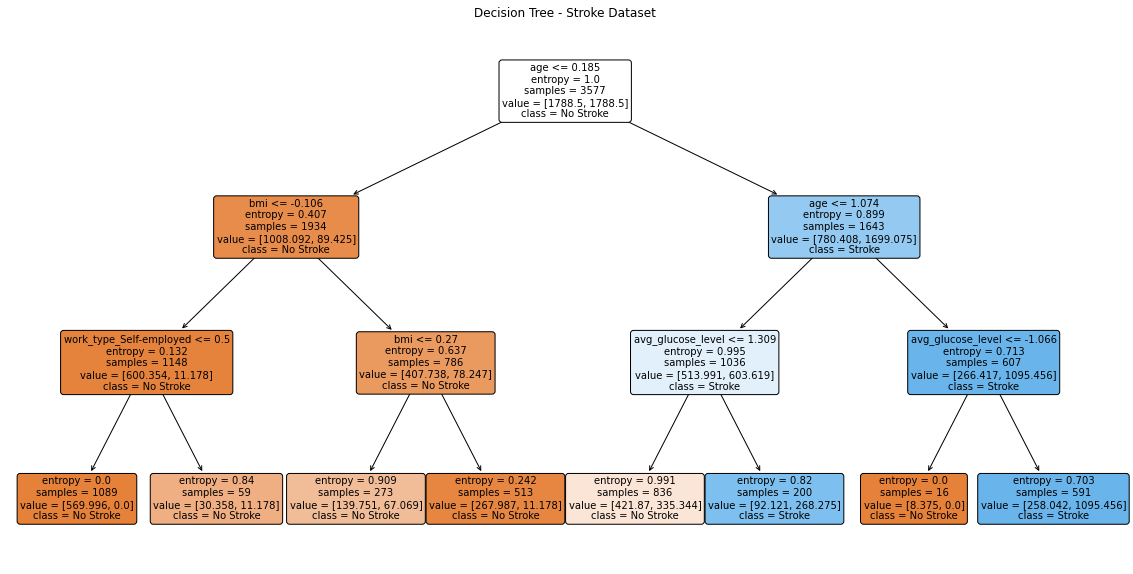

In [ ]:
# --- Visualize the tree ---

# Define your human-readable class names
current_features = X_train_processed.columns.tolist()
target_labels = ["No Stroke", "Stroke"]

plt.figure(figsize=(20,10))
plot_tree(
    clf2,
    feature_names= current_features,
    class_names=target_labels,
    filled=True,           # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Stroke Dataset")
plt.show()

In [227]:
# Instead of y_pred = clf.predict(X_test)
y_probs = clf2.predict_proba(X_test_processed)[:, 1]  # Get probabilities for Class 1
y_pred_new = (y_probs > 0.2).astype(int)    # Lower threshold to 20%


conf_matrix_dt3 = confusion_matrix(y_test, y_pred_new)
class_report_dt3 = classification_report(y_test, y_pred_new)

# Now check the confusion matrix again
print(confusion_matrix(y_test, y_pred_new))
print("\nConfusion Matrix Lasso:")
print(class_report_dt3)

[[686 758]
 [  6  83]]

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.99      0.48      0.64      1444
           1       0.10      0.93      0.18        89

    accuracy                           0.50      1533
   macro avg       0.55      0.70      0.41      1533
weighted avg       0.94      0.50      0.62      1533

